<a href="https://colab.research.google.com/github/Pridefrancas/DATATHON-2DTAT/blob/main/Analise_PRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

def create_conn():
    # Defina os parâmetros de conexão
    db_user = 'magic-steps_owner'
    db_password = 'FGD4APlVcW0u'
    db_host = 'ep-curly-wave-a4dkdimo.us-east-1.aws.neon.tech'
    db_port = '5432'
    db_name = 'magic-steps'

    # Crie a URL de conexão
    connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

    # Crie um engine do SQLAlchemy
    engine = create_engine(connection_url)
    return engine
engine = create_conn()




In [ ]:
# Ler as tabelas do PostgreSQL para dataframes pandas
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')

# Fazer o join entre os dataframes
merged_df = pd.merge(tbsituacaoalunoturma_m, tbalunoturma, left_on='IdSituacaoAlunoTurma', right_on='IdSituacaoAlunoTurma')

# Filtrar os dados conforme a condição especificada
filtered_df = merged_df[merged_df['SituacaoSistema'] != 'P']

# Converter a coluna de data para datetime e extrair o ano
filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year

# Agrupar pelos campos necessários e contar
grouped_df = filtered_df.groupby(['SituacaoAlunoTurma', 'ano']).size().reset_index(name='count')

# Ordenar por ano em ordem decrescente
result_df = grouped_df.sort_values(by='ano', ascending=False)

print(result_df)

      SituacaoAlunoTurma   ano  count
1               Cursando  2024   1807
5             Desistente  2024    249
8        Mudança de Fase  2024     36
0    Aprovado P. Parcial  2023     71
4             Desistente  2023    469
7        Mudança de Fase  2023     75
9              Reprovado  2023     27
12  Troca de Fase *Anual  2023   1446
3             Desistente  2022    784
6        Mudança de Fase  2022    125
11  Troca de Fase *Anual  2022   3026
2             Desistente  2021     43
10  Troca de Fase *Anual  2021    962


<ipython-input-2-6f6fae780626>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
<ipython-input-2-6f6fae780626>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year


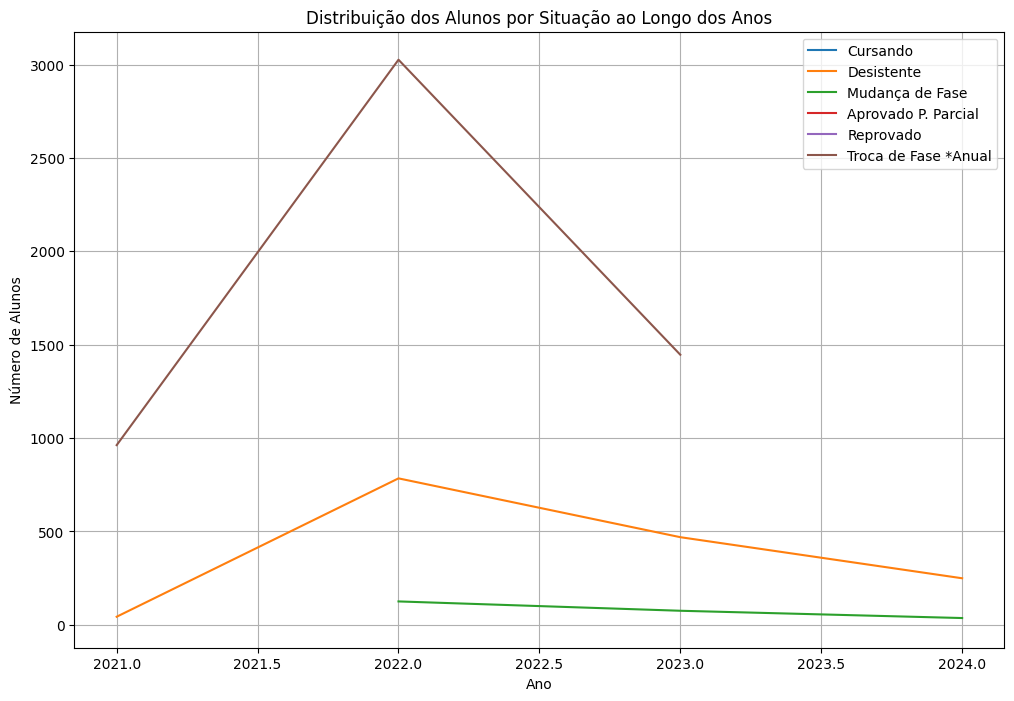

In [ ]:
import matplotlib.pyplot as plt

# Plotar a distribuição dos alunos por situação ao longo dos anos
plt.figure(figsize=(12, 8))
for situacao in result_df['SituacaoAlunoTurma'].unique():
    subset = result_df[result_df['SituacaoAlunoTurma'] == situacao]
    plt.plot(subset['ano'], subset['count'], label=situacao)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Distribuição dos Alunos por Situação ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()




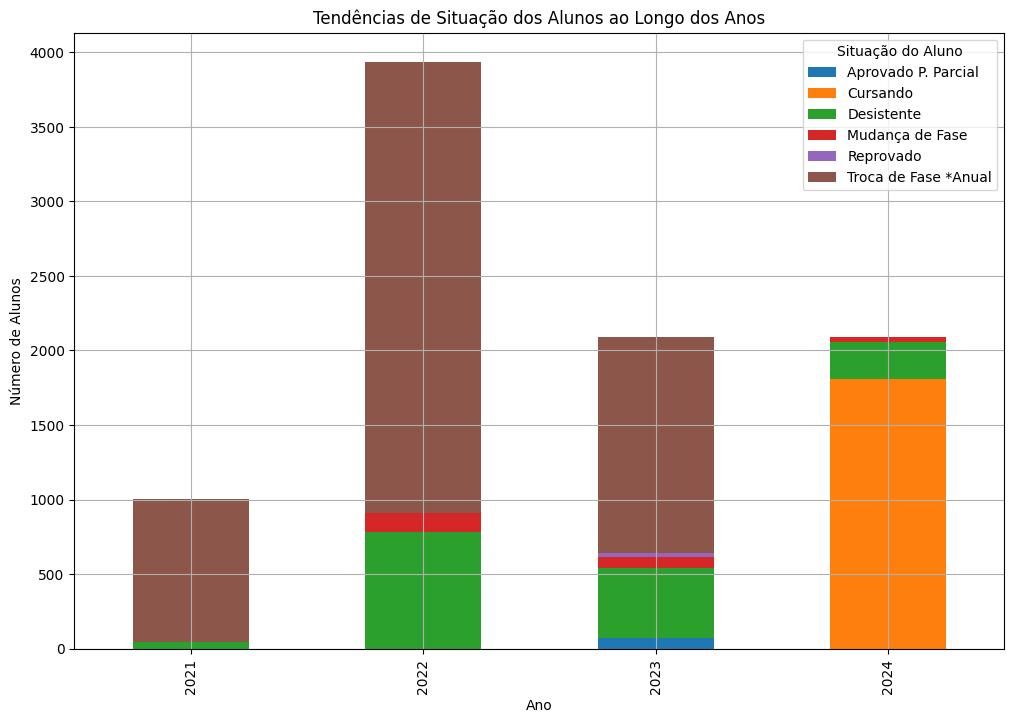

In [ ]:
# Análise de tendências
pivot_df = result_df.pivot(index='ano', columns='SituacaoAlunoTurma', values='count')
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Tendências de Situação dos Alunos ao Longo dos Anos')
plt.legend(title='Situação do Aluno')
plt.grid(True)
plt.show()


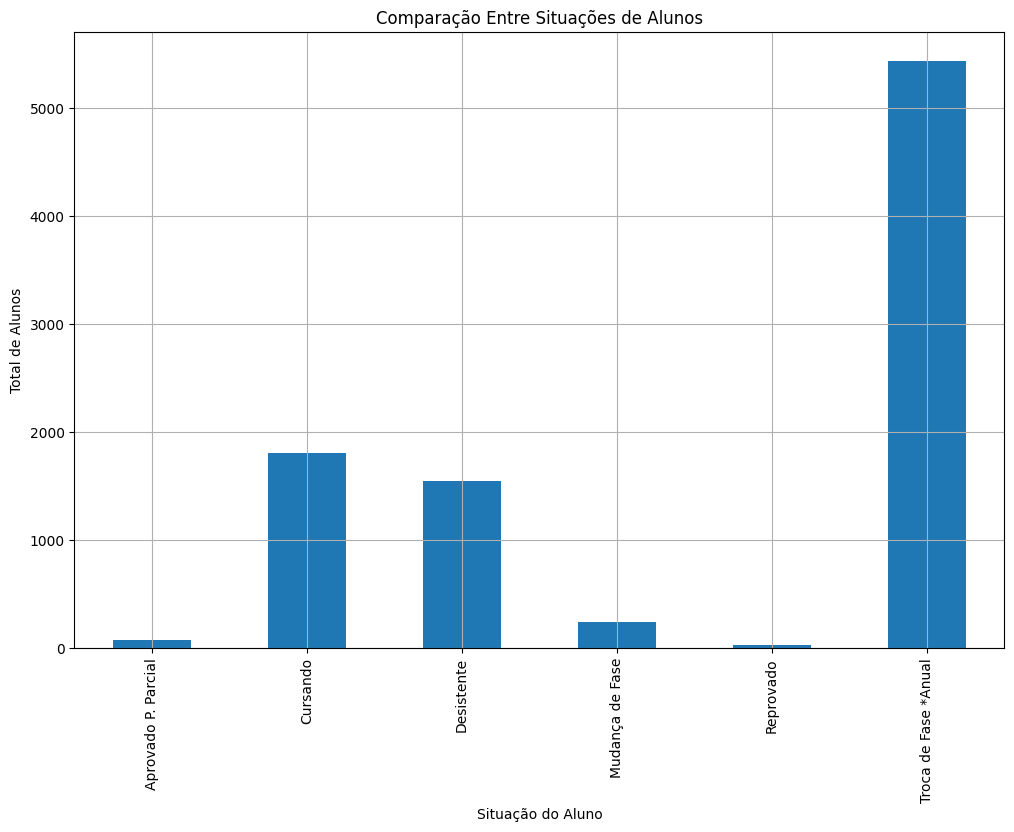

In [ ]:

# Comparação entre situações
plt.figure(figsize=(12, 8))
result_df.groupby('SituacaoAlunoTurma')['count'].sum().plot(kind='bar')

plt.xlabel('Situação do Aluno')
plt.ylabel('Total de Alunos')
plt.title('Comparação Entre Situações de Alunos')
plt.grid(True)
plt.show()

<ipython-input-11-7816771c3e0e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
<ipython-input-11-7816771c3e0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year


  SituacaoAlunoTurma   ano  count
3         Desistente  2024    249
2         Desistente  2023    469
1         Desistente  2022    784
0         Desistente  2021     43


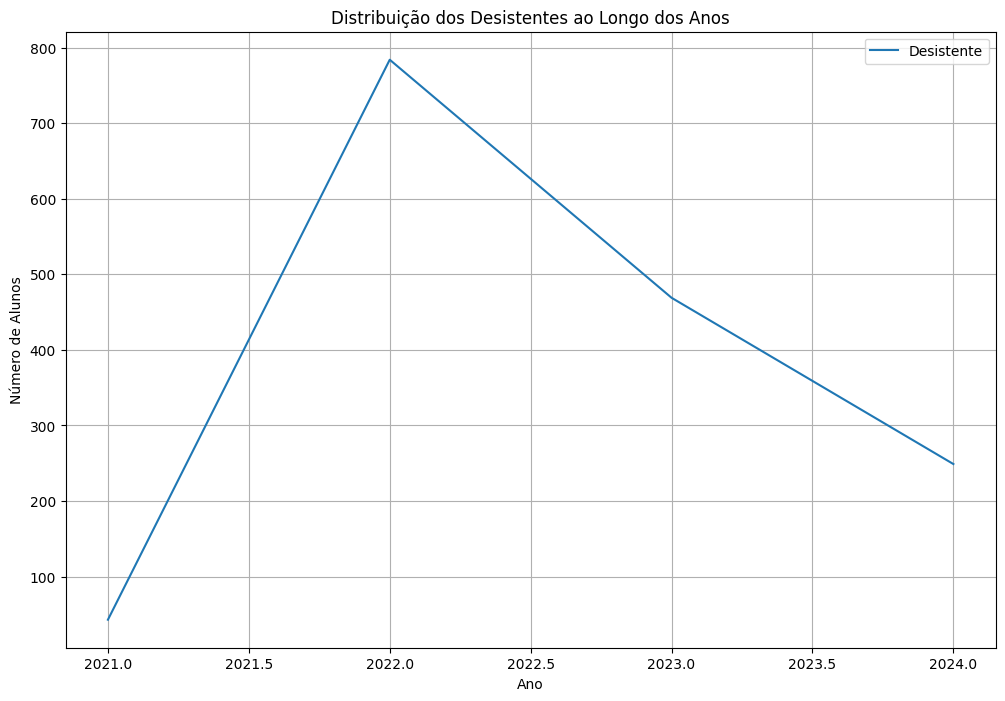

<Figure size 1200x800 with 0 Axes>

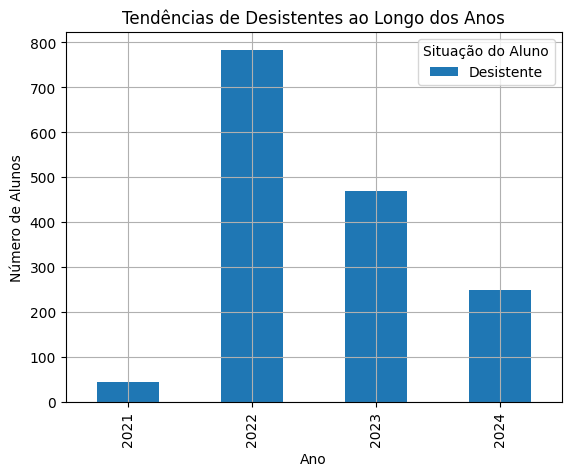

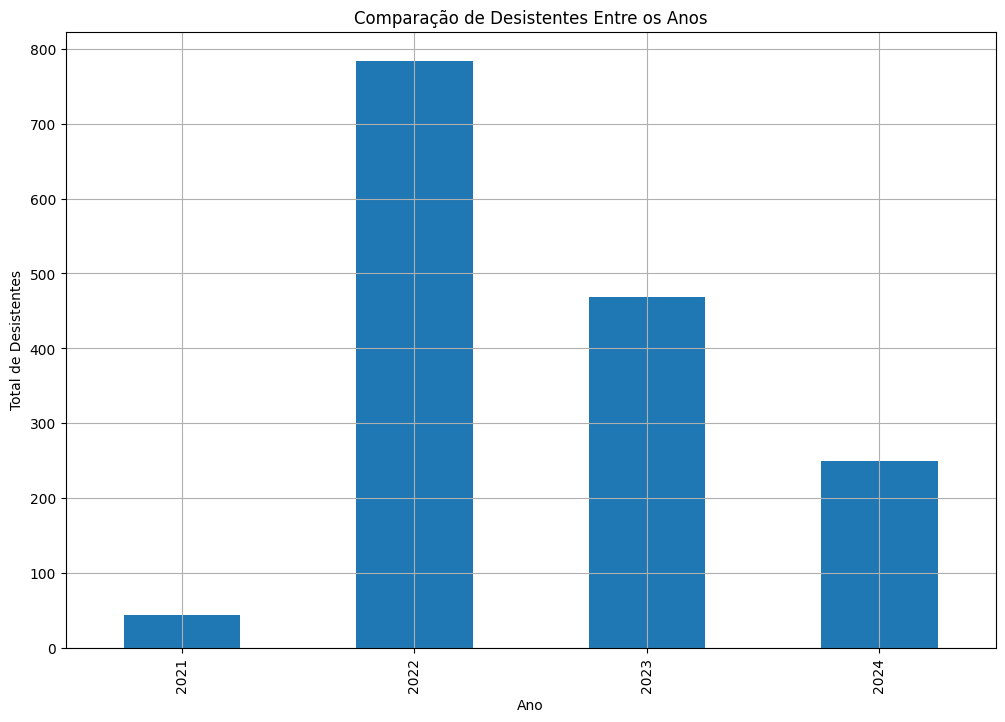

In [ ]:
# Conectar ao banco de dados e ler as tabelas
engine = create_conn()
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')

# Fazer o join entre os dataframes
merged_df = pd.merge(tbsituacaoalunoturma_m, tbalunoturma, left_on='IdSituacaoAlunoTurma', right_on='IdSituacaoAlunoTurma')

# Filtrar os dados conforme a condição especificada
filtered_df = merged_df[merged_df['SituacaoSistema'] != 'P']

# Converter a coluna de data para datetime e extrair o ano
filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year

# Filtrar apenas os "Desistentes"
desistentes_df = filtered_df[filtered_df['SituacaoAlunoTurma'] == 'Desistente']

# Agrupar pelos campos necessários e contar
grouped_df = desistentes_df.groupby(['SituacaoAlunoTurma', 'ano']).size().reset_index(name='count')

# Ordenar por ano em ordem decrescente
result_df = grouped_df.sort_values(by='ano', ascending=False)

# Mostrar os dados
print(result_df)

# Plotar a distribuição dos desistentes ao longo dos anos
plt.figure(figsize=(12, 8))
for situacao in result_df['SituacaoAlunoTurma'].unique():
    subset = result_df[result_df['SituacaoAlunoTurma'] == situacao]
    plt.plot(subset['ano'], subset['count'], label=situacao)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Distribuição dos Desistentes ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

# Análise de tendências
plt.figure(figsize=(12, 8))
pivot_df = result_df.pivot(index='ano', columns='SituacaoAlunoTurma', values='count')
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Tendências de Desistentes ao Longo dos Anos')
plt.legend(title='Situação do Aluno')
plt.grid(True)
plt.show()

# Comparação entre anos
plt.figure(figsize=(12, 8))
result_df.groupby('ano')['count'].sum().plot(kind='bar')

plt.xlabel('Ano')
plt.ylabel('Total de Desistentes')
plt.title('Comparação de Desistentes Entre os Anos')
plt.grid(True)
plt.show()

<ipython-input-12-7816771c3e0e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
<ipython-input-12-7816771c3e0e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year


  SituacaoAlunoTurma   ano  count
3         Desistente  2024    249
2         Desistente  2023    469
1         Desistente  2022    784
0         Desistente  2021     43


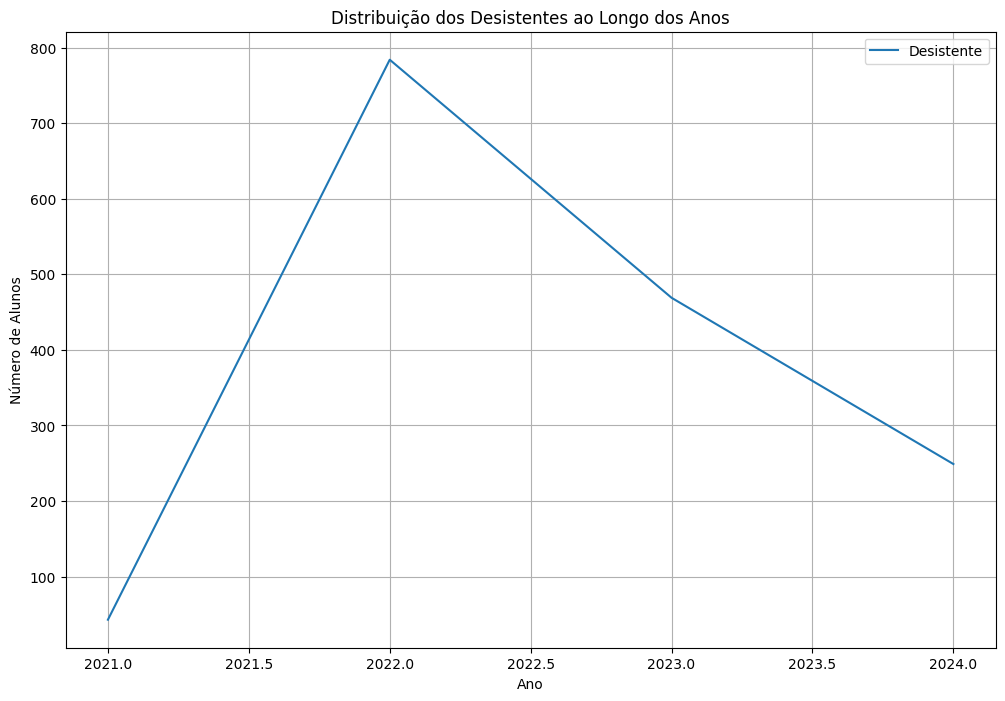

<Figure size 1200x800 with 0 Axes>

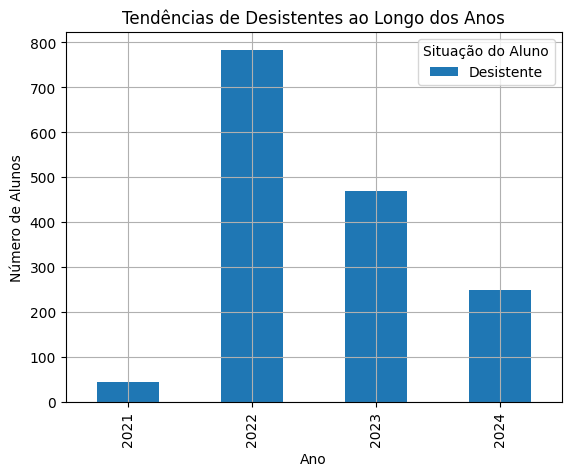

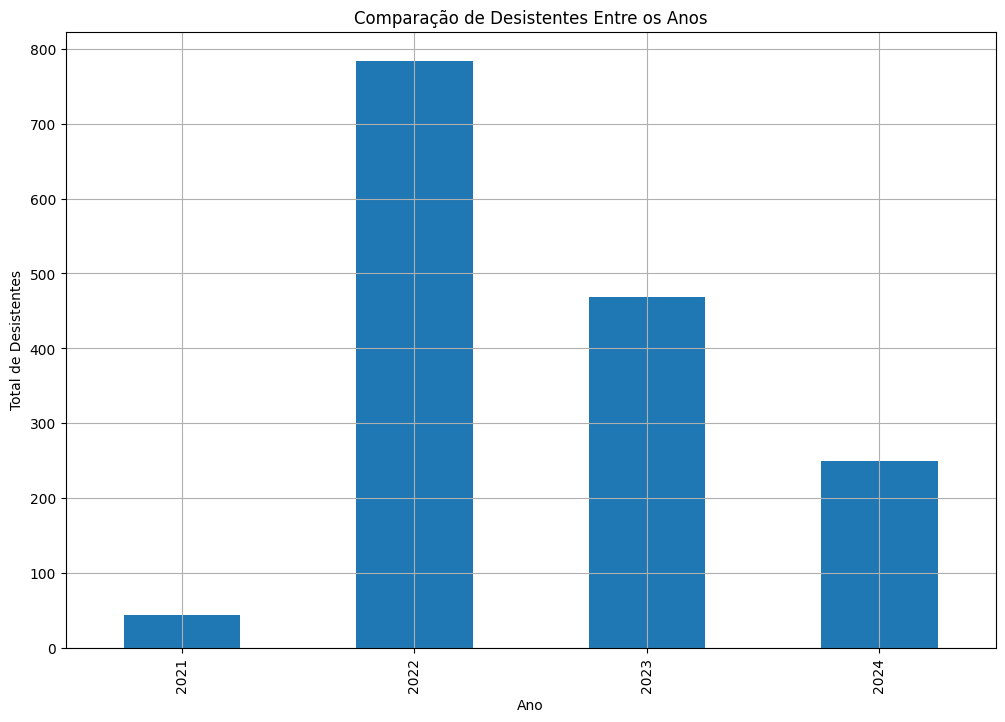

In [ ]:
# Conectar ao banco de dados e ler as tabelas
engine = create_conn()
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')

# Fazer o join entre os dataframes
merged_df = pd.merge(tbsituacaoalunoturma_m, tbalunoturma, left_on='IdSituacaoAlunoTurma', right_on='IdSituacaoAlunoTurma')

# Filtrar os dados conforme a condição especificada
filtered_df = merged_df[merged_df['SituacaoSistema'] != 'P']

# Converter a coluna de data para datetime e extrair o ano
filtered_df['DataSituacaoAtivo'] = pd.to_datetime(filtered_df['DataSituacaoAtivo'])
filtered_df['ano'] = filtered_df['DataSituacaoAtivo'].dt.year

# Filtrar apenas os "Desistentes"
desistentes_df = filtered_df[filtered_df['SituacaoAlunoTurma'] == 'Desistente']

# Agrupar pelos campos necessários e contar
grouped_df = desistentes_df.groupby(['SituacaoAlunoTurma', 'ano']).size().reset_index(name='count')

# Ordenar por ano em ordem decrescente
result_df = grouped_df.sort_values(by='ano', ascending=False)

# Mostrar os dados
print(result_df)

# Plotar a distribuição dos desistentes ao longo dos anos
plt.figure(figsize=(12, 8))
for situacao in result_df['SituacaoAlunoTurma'].unique():
    subset = result_df[result_df['SituacaoAlunoTurma'] == situacao]
    plt.plot(subset['ano'], subset['count'], label=situacao)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Distribuição dos Desistentes ao Longo dos Anos')
plt.legend()
plt.grid(True)
plt.show()

# Análise de tendências
plt.figure(figsize=(12, 8))
pivot_df = result_df.pivot(index='ano', columns='SituacaoAlunoTurma', values='count')
pivot_df.plot(kind='bar', stacked=True)

plt.xlabel('Ano')
plt.ylabel('Número de Alunos')
plt.title('Tendências de Desistentes ao Longo dos Anos')
plt.legend(title='Situação do Aluno')
plt.grid(True)
plt.show()

# Comparação entre anos
plt.figure(figsize=(12, 8))
result_df.groupby('ano')['count'].sum().plot(kind='bar')

plt.xlabel('Ano')
plt.ylabel('Total de Desistentes')
plt.title('Comparação de Desistentes Entre os Anos')
plt.grid(True)
plt.show()

In [ ]:
# Ler as tabelas do PostgreSQL para dataframes pandas
tbaluno_df = pd.read_sql_table('tbaluno', con=engine, schema='magic_steps')
tbsituacaoalunoturma_m = pd.read_sql_table('tbsituacaoalunoturma_m', con=engine, schema='magic_steps')
tbalunoturma = pd.read_sql_table('tbalunoturma', con=engine, schema='magic_steps')
aluno_obs_df = pd.read_sql_table('tbalunoobs', con=engine, schema='magic_steps')



In [ ]:
aluno_merged_df = pd.merge(tbaluno_df, aluno_obs_df, on='IdAluno', how='inner')

In [ ]:
# Unir o resultado com TbAlunoTurma
aluno_turma_merged_df = pd.merge(aluno_merged_df, tbalunoturma, on='IdAluno', how='inner')

In [ ]:
# Unir TbAlunoTurma com TbSituacaoAlunoTurma usando IdSituacaoAlunoTurma
merged_df = pd.merge(aluno_turma_merged_df, tbsituacaoalunoturma_m, on='IdSituacaoAlunoTurma', how='inner')

In [ ]:
selected_columns =  merged_df [['IdAluno', 'IdAlunoTurma', 'SituacaoAlunoTurma', 'ObservacaoRegistro']]
print("Colunas selecionadas:")
print(selected_columns.head())

Colunas selecionadas:
   IdAluno  IdAlunoTurma    SituacaoAlunoTurma  \
0        3             3  Troca de Fase *Anual   
1        3          1096  Troca de Fase *Anual   
2        3          1616  Troca de Fase *Anual   
3        3          2867  Troca de Fase *Anual   
4        3             3  Troca de Fase *Anual   

                                  ObservacaoRegistro  
0  Segue em orientação psico e observação equipe ...  
1  Segue em orientação psico e observação equipe ...  
2  Segue em orientação psico e observação equipe ...  
3  Segue em orientação psico e observação equipe ...  
4  Programa que participa Bolsista na rede decisã...  


In [ ]:
merged_df.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,...,StProcessamento_ConfirmacaoReservaOnline,StProcessamento_InscricaoEmTurma,IdAlunoTurma,SituacaoAlunoTurma,SituacaoSistema,SituacaoAcademica,StPermitirDigitacaoNotaFalta,StPermiteAssinaturaEletronica,CdSituacaoEducaCenso,DominioSituacaoAlunoTurma
0,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,3,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
1,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,1096,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
2,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,1616,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
3,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,2867,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
4,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,3,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado


In [ ]:
merged_df

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,...,StProcessamento_ConfirmacaoReservaOnline,StProcessamento_InscricaoEmTurma,IdAlunoTurma,SituacaoAlunoTurma,SituacaoSistema,SituacaoAcademica,StPermitirDigitacaoNotaFalta,StPermiteAssinaturaEletronica,CdSituacaoEducaCenso,DominioSituacaoAlunoTurma
0,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,3,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
1,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,1096,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
2,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,1616,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
3,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,2867,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
4,3,Aluno 1,NaN,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,...,,,3,Troca de Fase *Anual,I,A,True,False,NaN,nao_informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146894,1687,Aluno 1666,NaN,1.0,F,5.0,2007-11-27 00:00:00,1345.0,None,1345.0,...,,,9502,Reprovado,I,R,False,False,NaN,nao_informado
146895,1687,Aluno 1666,NaN,1.0,F,5.0,2007-11-27 00:00:00,1345.0,None,1345.0,...,,,9502,Reprovado,I,R,False,False,NaN,nao_informado
146896,2247,Aluno 2223,NaN,1.0,F,5.0,2007-01-01 00:00:00,NaN,None,1559.0,...,,,12809,Pré-matrícula,P,,False,False,NaN,nao_informado
146897,2247,Aluno 2223,NaN,1.0,F,5.0,2007-01-01 00:00:00,NaN,None,1559.0,...,,,12810,Pré-matrícula,P,,False,False,NaN,nao_informado


In [ ]:
import pandas as pd

# Exemplo de criação do DataFrame para referência
# merged_df = pd.DataFrame({
#     'IdAluno': [1, 2, 3, 4],
#     'IdAlunoTurma': [101, 102, 103, 104],
#     'SituacaoAlunoTurma': ['Desistentes', 'Ativo', 'Desistentes', 'Ativo'],
#     'ObservacaoRegistro': ['Nota baixa', 'Bom desempenho', 'Mudança de cidade', 'Transferido']
# })

# Filtrar o DataFrame para trazer apenas 'Desistentes' e selecionar as colunas desejadas
filtered_df = merged_df.loc[merged_df['SituacaoAlunoTurma'] == 'Desistente', 'ObservacaoRegistro']

# Exibir o DataFrame filtrado
print(filtered_df)


98669     Segue em orientação psico e observação equipe ...
98670     Segue em orientação psico e observação equipe ...
98671     Segue em orientação psico e observação equipe ...
98672     Programa que participa Bolsista na rede decisã...
98673     Programa que participa Bolsista na rede decisã...
                                ...                        
108836                              Autoconfiança nos pais.
108837    Iniciou em junho, fez prova fora do processo s...
108838    Iniciou em junho, fez prova fora do processo s...
108839    Iniciou em junho e veio somente em duas aulas....
108840    Iniciou em junho e veio somente em duas aulas....
Name: ObservacaoRegistro, Length: 10172, dtype: object


In [ ]:
# Concatenar todos os textos de 'ObservacaoRegistro' em uma única string
text = " ".join(filtered_df['ObservacaoRegistro'])

# Definir stopwords em português
stopwords = set(STOPWORDS)
stopwords.update([
    "de", "a", "o", "que", "e", "do", "da", "em", "um", "para",
    "é", "com", "não", "uma", "os", "no", "se", "na", "por",
    "mais", "as", "dos", "como", "mas", "foi", "ao", "ele",
    "das", "tem", "à", "seu", "sua", "ou", "ser", "quando",
    "muito", "há", "nos", "já", "está", "eu", "também", "só",
    "pelo", "pela", "até", "isso", "ela", "entre", "depois",
    "sem", "mesmo", "aos", "ter", "seus", "quem", "nas", "me",
    "esse", "eles", "estão", "você", "tinha", "foram", "essa",
    "num", "nem", "suas", "meu", "às", "minha", "têm", "numa",
    "pelos", "elas", "qual", "nós", "lhe", "deles", "essas",
    "esses", "pelas", "este", "dele", "tu", "te", "vocês", "vos",
    "lhes", "meus", "minhas", "teu", "tua", "teus", "tuas",
    "nosso", "nossa", "nossos", "nossas", "dela", "delas",
    "esta", "estes", "estas", "aquele", "aquela", "aqueles",
    "aquelas", "isto", "aquilo", "estou", "está", "estamos",
    "estão", "estive", "esteve", "estivemos", "estiveram",
    "estava", "estávamos", "estavam", "estivera", "estivéramos",
    "esteja", "estejamos", "estejam", "estivesse", "estivéssemos",
    "estivessem", "estiver", "estivermos", "estiverem", "hei",
    "há", "havemos", "hão", "houve", "houvemos", "houveram",
    "houvera", "houvéramos", "haja", "hajamos", "hajam",
    "houvesse", "houvéssemos", "houvessem", "houver",
    "houvermos", "houverem", "houverei", "houverá", "houveremos",
    "houverão", "houveria", "houveríamos", "houveriam",
    "sou", "somos", "são", "era", "éramos", "eram", "fui",
    "foi", "fomos", "foram", "fora", "fôramos", "seja",
    "sejamos", "sejam", "fosse", "fôssemos", "fossem",
    "for", "formos", "forem", "serei", "será", "seremos",
    "serão", "seria", "seríamos", "seriam", "tenho",
    "temos", "tém", "tinha", "tínhamos", "tinham", "tive",
    "teve", "tivemos", "tiveram", "tivera", "tivéramos",
    "tenha", "tenhamos", "tenham", "tivesse", "tivéssemos",
    "tivessem", "tiver", "tivermos", "tiverem", "terei",
    "terá", "teremos", "terão", "teria", "teríamos", "teriam"
])

# Gerar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, collocations=False).generate(text)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'ObservacaoRegistro'

In [ ]:
# Defina a consulta SQL para a view
query = 'SELECT * FROM magic_steps.inativos_full'

# Execute a consulta e carregue os resultados em um DataFrame
df_inativos_full = pd.read_sql(query, engine)

# Mostre as primeiras linhas do DataFrame
print(df_inativos_full.head())

              motivoinativacao nomedisciplina  notafase       nomefase  \
0  Outras prioridades/trabalho         INGLÊS       5.5  DIAGNOSTICA 1   
1  Outras prioridades/trabalho         INGLÊS       0.0  DIAGNOSTICA 1   
2  Outras prioridades/trabalho         INGLÊS       0.0  DIAGNOSTICA 1   
3  Outras prioridades/trabalho      PORTUGUÊS       4.5  DIAGNOSTICA 1   
4  Outras prioridades/trabalho     MATEMÁTICA       6.5  DIAGNOSTICA 1   

   idfasenota  numerofase  idade corraca sexo    datasituacaoativo  \
0         278           1   19.0       B    F  2022-01-01 00:00:00   
1         278           1   19.0       R    F  2022-01-01 00:00:00   
2         278           1   20.0       R    F  2022-01-01 00:00:00   
3         266           1   20.0       R    F  2022-01-01 00:00:00   
4         266           1   20.0       R    F  2022-01-01 00:00:00   

   datasituacaoinativo datahoraefetivacaomatricula  diasmatriculado  
0  2022-05-05 00:00:00         2022-02-28 00:00:00             6

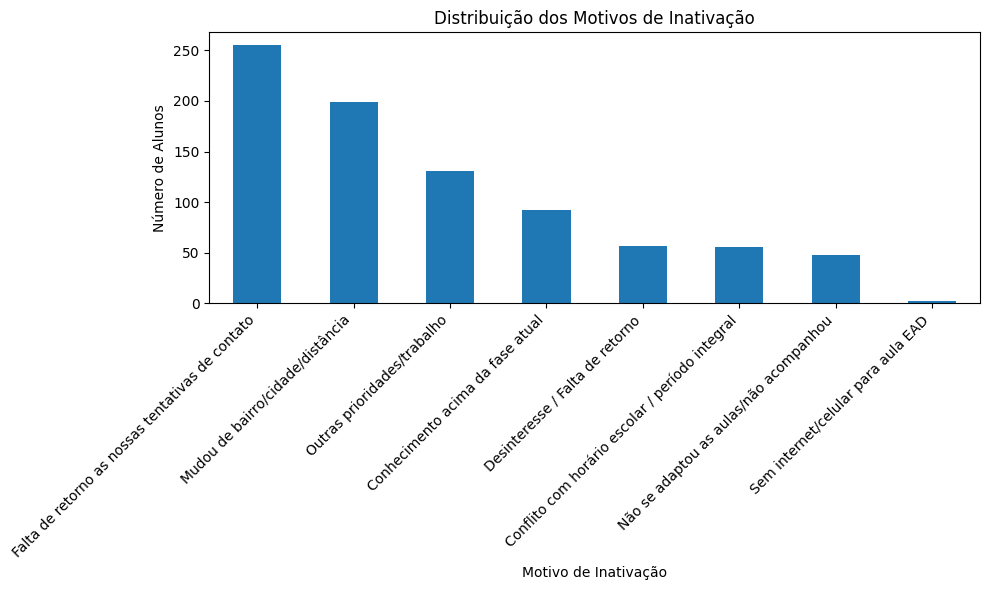

In [ ]:
import matplotlib.pyplot as plt
# Count the occurrences of each inactivation reason
reason_counts = df_inativos_full['motivoinativacao'].value_counts()

# Plot the distribution of inactivation reasons
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar')
plt.title('Distribuição dos Motivos de Inativação')
plt.xlabel('Motivo de Inativação')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Motivos de inativação entre os alunos:

**Outras prioridades/trabalho:** Este é o motivo mais frequente para a inativação dos alunos. Isso sugere que muitos estudantes estão priorizando o trabalho ou outras atividades sobre seus estudos.

**Sem adaptação ao curso:** Outro motivo comum, indicando que alguns alunos podem não ter se ajustado bem ao curso ou à instituição.

**Desistência por motivos pessoais:** Reflete que questões pessoais são uma razão significativa para alguns alunos deixarem o curso.

**Problemas financeiros:** Também aparece com frequência, indicando que dificuldades econômicas têm um impacto considerável na continuidade dos estudos.

Este gráfico ajuda a entender melhor os desafios enfrentados pelos alunos e pode auxiliar na formulação de estratégias para reduzir as taxas de inativação, como suporte financeiro, aconselhamento acadêmico e ajustes curriculares.

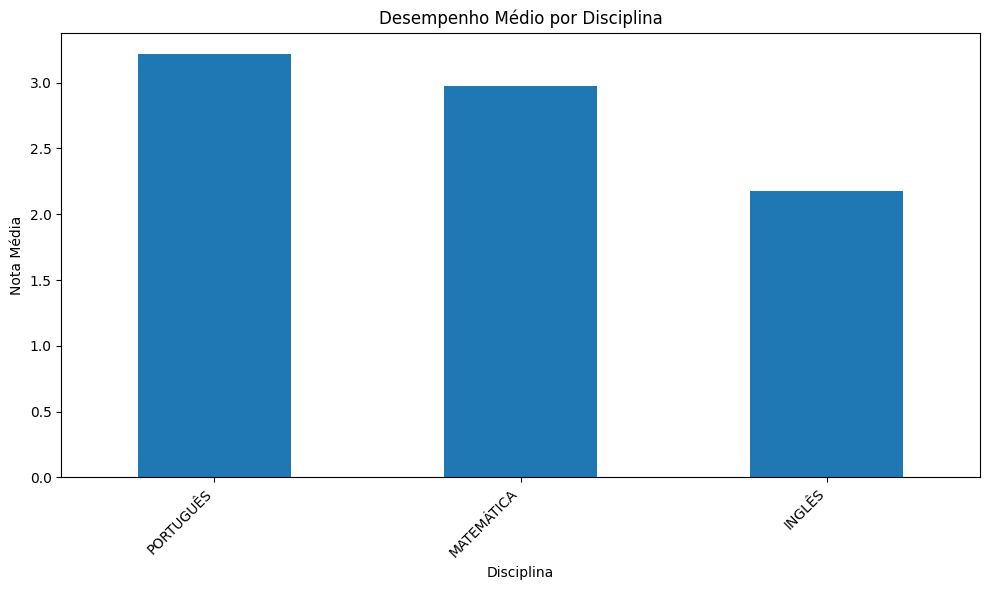

,nomedisciplina,Nota Média
0,PORTUGUÊS,3.218153
1,MATEMÁTICA,2.975146
2,INGLÊS,2.176630


In [ ]:
# Calculate the average grade per discipline
average_grade_per_discipline = df_inativos_full.groupby('nomedisciplina')['notafase'].mean().sort_values(ascending=False)

# Plot the average grades per discipline
plt.figure(figsize=(10, 6))
average_grade_per_discipline.plot(kind='bar')
plt.title('Desempenho Médio por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota Média')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the average grades in a table
average_grade_per_discipline.reset_index(name='Nota Média')
